<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB6_CLASS_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MERGE

In [84]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import random

In [5]:
# 테이블 생성
left = pd.DataFrame({ 'id':[1,2,3,4,5],
'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
'subject_id':['sub1','sub2','sub4','sub6','sub5']})
right = pd.DataFrame( {'id':[1,2,3,4,5],
'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [3]:
left

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [4]:
right

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


In [6]:
pd.merge(left, right, on='subject_id', how='inner')

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


In [7]:
pd.merge(left, right, on='subject_id', how='outer')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,NaN,NaN,sub3,3.0,Bran
3,3.0,Allen,sub4,2.0,Brian
4,5.0,Ayoung,sub5,5.0,Betty
5,4.0,Alice,sub6,4.0,Bryce


In [8]:
pd.merge(left, right, on='subject_id', how='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [13]:
pd.merge(left, right, on='subject_id', how='right', suffixes=('_left', '_right'))

,id_left,Name_left,subject_id,id_right,Name_right
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,NaN,NaN,sub3,3,Bran
3,4.0,Alice,sub6,4,Bryce
4,5.0,Ayoung,sub5,5,Betty


In [14]:
pd.merge(left, right, on=['id', 'subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


# CONCAT

In [15]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
columns=['letter', 'number'])

In [16]:
df1

,letter,number
0,a,1
1,b,2


In [17]:
df2

,letter,number
0,c,3
1,d,4


In [18]:
# 위아래로 붙이기
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [19]:
# 옆으로 붙이기
pd.concat([df1, df2], axis=1)

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


# 대출데이터 병합

In [134]:
# 파일열기
train = pd.read_csv('/content/loan_train.csv')
test = pd.read_csv('/content/loan_test.csv')

In [135]:
# 사이즈 체크
train.shape, test.shape

((614, 13), (367, 12))

In [136]:
# 컬럼이름 확인
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [137]:
# 테스트에 Loan_Status라는 컬럼을 생성
test['Loan_Status'] = 1

In [138]:
# 테스트 사이즈 체크
test.shape

(367, 13)

In [139]:
# 위아래로 붙인후 모양 체크
loan = pd.concat([train, test])
loan.shape

(981, 13)

# 피벗테이블

In [66]:
A = ['foo']*5 + ['bar']*4
A

['foo', 'foo', 'foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'bar']

In [67]:
B = ['one']*3 + ['two']*2 + ['one']*2 + ['two']*2
B

['one', 'one', 'one', 'two', 'two', 'one', 'one', 'two', 'two']

In [69]:
# small, large에서 랜덤하게 9개 리스트 만들기
opt = ['small', 'large']
C = [random.choice(opt) for i in range(9)]
C

['small',
 'small',
 'small',
 'small',
 'small',
 'large',
 'small',
 'small',
 'large']

In [70]:
# D는 1에서 7사이에 랜덤하게 만들기
D = [random.randint(1, 7) for i in range(9)]
D

[5, 1, 7, 1, 3, 5, 5, 5, 3]

In [71]:
# E는 2에서 9사이에 랜덤하게 만들기
E = [random.randint(2, 9) for i in range(9)]
E

[2, 4, 8, 3, 8, 7, 2, 7, 9]

In [72]:
df = pd.DataFrame({
    'A': A,
    'B': B,
    'C': C,
    'D': D,
    'E': E})
df

,A,B,C,D,E
0,foo,one,small,5,2
1,foo,one,small,1,4
2,foo,one,small,7,8
3,foo,two,small,1,3
4,foo,two,small,3,8
5,bar,one,large,5,7
6,bar,one,small,5,2
7,bar,two,small,5,7
8,bar,two,large,3,9


In [80]:
tab = pd.pivot_table(df, index=['A', 'B'], columns='C', values='D', aggfunc=np.sum)
tab

<ipython-input-80-f141aa07cb24>:1: FutureWarning: The provided callable <function sum at 0x7a1665f1b2e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tab = pd.pivot_table(df, index=['A', 'B'], columns='C', values='D', aggfunc=np.sum)


C        large  small
A   B                
bar one    5.0    5.0
    two    3.0    5.0
foo one    NaN   13.0
    two    NaN    4.0

<Axes: xlabel='A,B'>

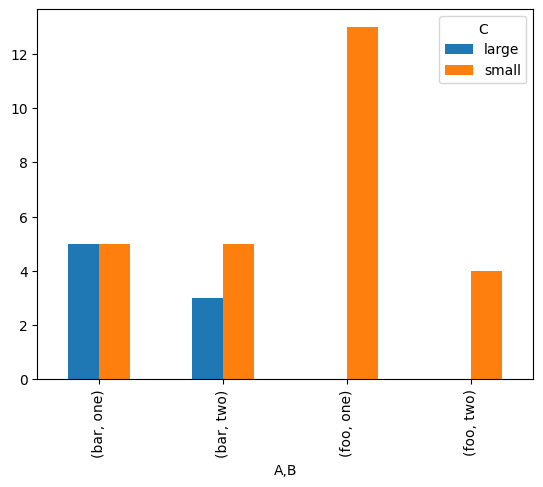

In [83]:
# 피벗테이블 시각화
tab.plot(kind='bar')

In [85]:
# 고객 데이터를 피벗테이블을 이용해서 분석
customer = pd.read_excel('/content/xlmd_customer.xls')
customer.head()

,CUST ID,REGION,RENT VS. OWN,NUM HOUSEHOLD,ANNUAL INCOME,TOTAL PURCHASES,NUM PURCHASES
0,1,North,Own,1,10K-25K,38,1
1,2,South,Own,4,100K+,30,4
2,3,North,Rent,3,25K-50K,19,3
3,4,West,Own,5,25K-50K,21,6
4,5,East,Own,6,50K-100K,35,7


In [86]:
# 데이터 사이즈 확인
customer.shape

(487, 7)

In [87]:
# 컬럼이름 확인
customer.columns

Index(['CUST ID', 'REGION', 'RENT VS. OWN', 'NUM HOUSEHOLD', 'ANNUAL INCOME',
       'TOTAL PURCHASES', 'NUM PURCHASES'],
      dtype='object')

In [88]:
# 데이터 타입 확인
customer.dtypes

,0
CUST ID,int64
REGION,object
RENT VS. OWN,object
NUM HOUSEHOLD,int64
ANNUAL INCOME,object
TOTAL PURCHASES,int64
NUM PURCHASES,int64


In [90]:
# 피벗테이블로 요약
tab = pd.pivot_table(customer, index=['REGION', 'RENT VS. OWN'], columns = ['NUM HOUSEHOLD'], values='TOTAL PURCHASES', aggfunc=np.sum)
tab

<ipython-input-90-24d55a242c80>:1: FutureWarning: The provided callable <function sum at 0x7a1665f1b2e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tab = pd.pivot_table(customer, index=['REGION', 'RENT VS. OWN'], columns = ['NUM HOUSEHOLD'], values='TOTAL PURCHASES', aggfunc=np.sum)


NUM HOUSEHOLD          1    2     3     4     5     6    7
REGION RENT VS. OWN                                       
East   Own           312  455  1195  1546   731  1039  515
       Rent          694  534   807   665   620   562  558
North  Own           149  820   806   542  1014   782  147
       Rent          420  528  1325   576  1013   465  175
South  Own            48  632   584  1039   392   357  274
       Rent          179  695   513   890   324   281  204
West   Own           438  292   797  1306   536   839  127
       Rent          257  688   606   706   806   301  290

<Axes: xlabel='REGION,RENT VS. OWN'>

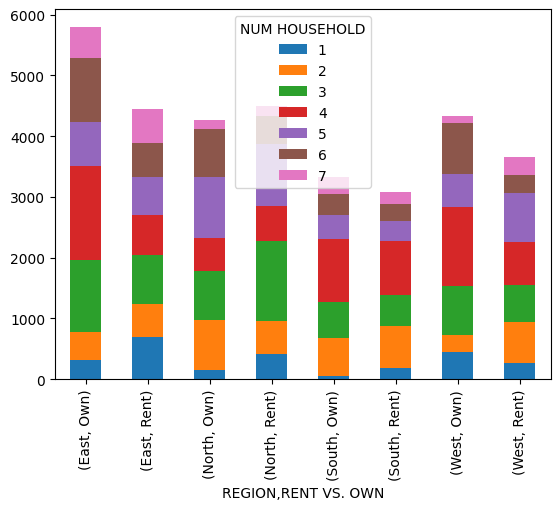

In [95]:
# 피벗테이블 시각화
tab.plot(kind='bar', stacked=True)

# 크로스탭

In [97]:
# 데이터 생성
foo = pd.Categorical(['a', 'b'],
categories=['a', 'b', 'c'])
bar = pd.Categorical(['d', 'e'],
categories=['d', 'e', 'f'])

In [98]:
foo

['a', 'b']
Categories (3, object): ['a', 'b', 'c']

In [99]:
bar

['d', 'e']
Categories (3, object): ['d', 'e', 'f']

In [104]:
# 크로스탭으로 요약
table = pd.crosstab(foo, bar, dropna=False)
table

col_0,d,e,f
row_0,,,
a,1,0,0
b,0,1,0
c,0,0,0


<Axes: xlabel='row_0'>

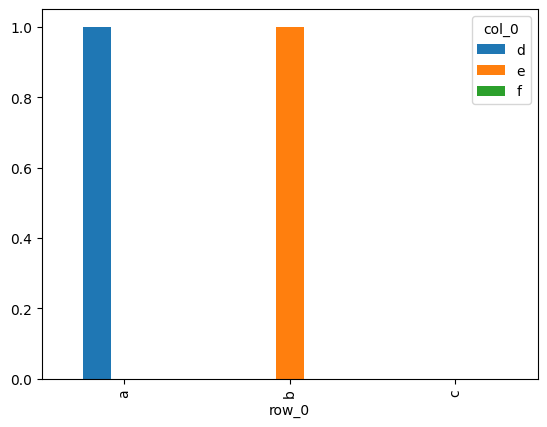

In [106]:
# 시각화해서 요약
table.plot(kind='bar')

# apply

In [111]:
df = pd.DataFrame([[4, 9],] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [112]:
df.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [113]:
df.apply(np.sum, axis=0) #열로 적용

,0
A,12
B,27


In [115]:
df.apply(np.sum, axis=1) #행으로 적용

,0
0,13
1,13
2,13


# map

In [116]:
df.map(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [119]:
# 단어의 길이를 리턴하는 함수
def myfunc(n):
    return len(n)

In [121]:
x = map(myfunc, ('apple', 'banana', 'cherry'))
list(x)

[5, 6, 6]

# 계량형 데이터를 범주형 데이터로 바꾸는 방법

In [123]:
# 상위 5개 데이터 확인
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
# 데이터 타입 확인
loan.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [144]:
# 최댓값, 최소값 확인
loan.LoanAmount.max(), loan.LoanAmount.min()

(700.0, 9.0)

In [148]:
# 대출금액을 범위로 잘라서 빈도테이블 생성
type(pd.cut(loan.LoanAmount, bins=[9, 90, 140, 190, 700]).value_counts(sort=False))

pandas.core.series.Series

In [146]:
!pip freeze > requirements.txt